## Breat Cancer EDA (Exploratory Data Analysis)

### Import libraries

In [1]:
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

### Load Database

In [2]:
df=pd.read_csv("breast-cancer-wisconsin-data/data.csv")

### 1. Data and Feature Description

#### Display first 5 examples

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


We can see here the first 5 examples in the dataset.

#### Features of the database

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

As we can see the first column is 'id' which is irrelevant for the classification. <br>
The second column is the classification / target. Diagnosis (M= Malignant, B= Benign) <br>
The next 30 column are features describing the nuclei, those features are all real numbers. <br>
The last column appears to be irrelevant because all the values in it are NaN, which will not help us in the classification.

Ten real-valued features are computed for each cell nucleus: 

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


#### Rearange the dataset

In [5]:
df = df.drop(columns=['Unnamed: 32', 'id'])

In [6]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

#### Recheck for nulls in the Dataset

In [7]:
df.isnull().sum().sum()

0

As we can see now there are no null values in the dataset, <br>
Which means we can do statistics analysis.

### 2. Statistics of the data in the database

#### Feature Mean Description

In [45]:
X.iloc[:,:10].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


#### Feature Standard Error Description

In [46]:
X.iloc[:,10:20].describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


#### Feature Worst Description

In [47]:
X.iloc[:,20:30].describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We can see that the features have different mean and std, with a wide range of values. <br>
Which means that in the future we will need to scale them in order to optimize our prediction process.

#### Label Distribution

In [9]:
y.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
fig = go.Figure(data=[go.Pie(labels=['Benign','Malignant'], values=df['diagnosis'].value_counts(), textinfo='label+percent')])
fig.update_traces(hoverinfo='label+percent', textinfo='label+value+percent', textfont_size=20,
                  marker=dict(colors=['gold', 'mediumturquoise'], line=dict(color='#000000', width=2)))
fig.show()

As we can see, the dataset is imbalanced, as we have more Benign examples than Malignant examples. <br>
We will take under consideration when we split for train, valid and test datasets.

#### Feature Distribution

We will check the feature distribution for each group of features: mean, standard error and worst. <br>
We divide into this groups for better data visualization. <br>

#### Feature Mean Distribution

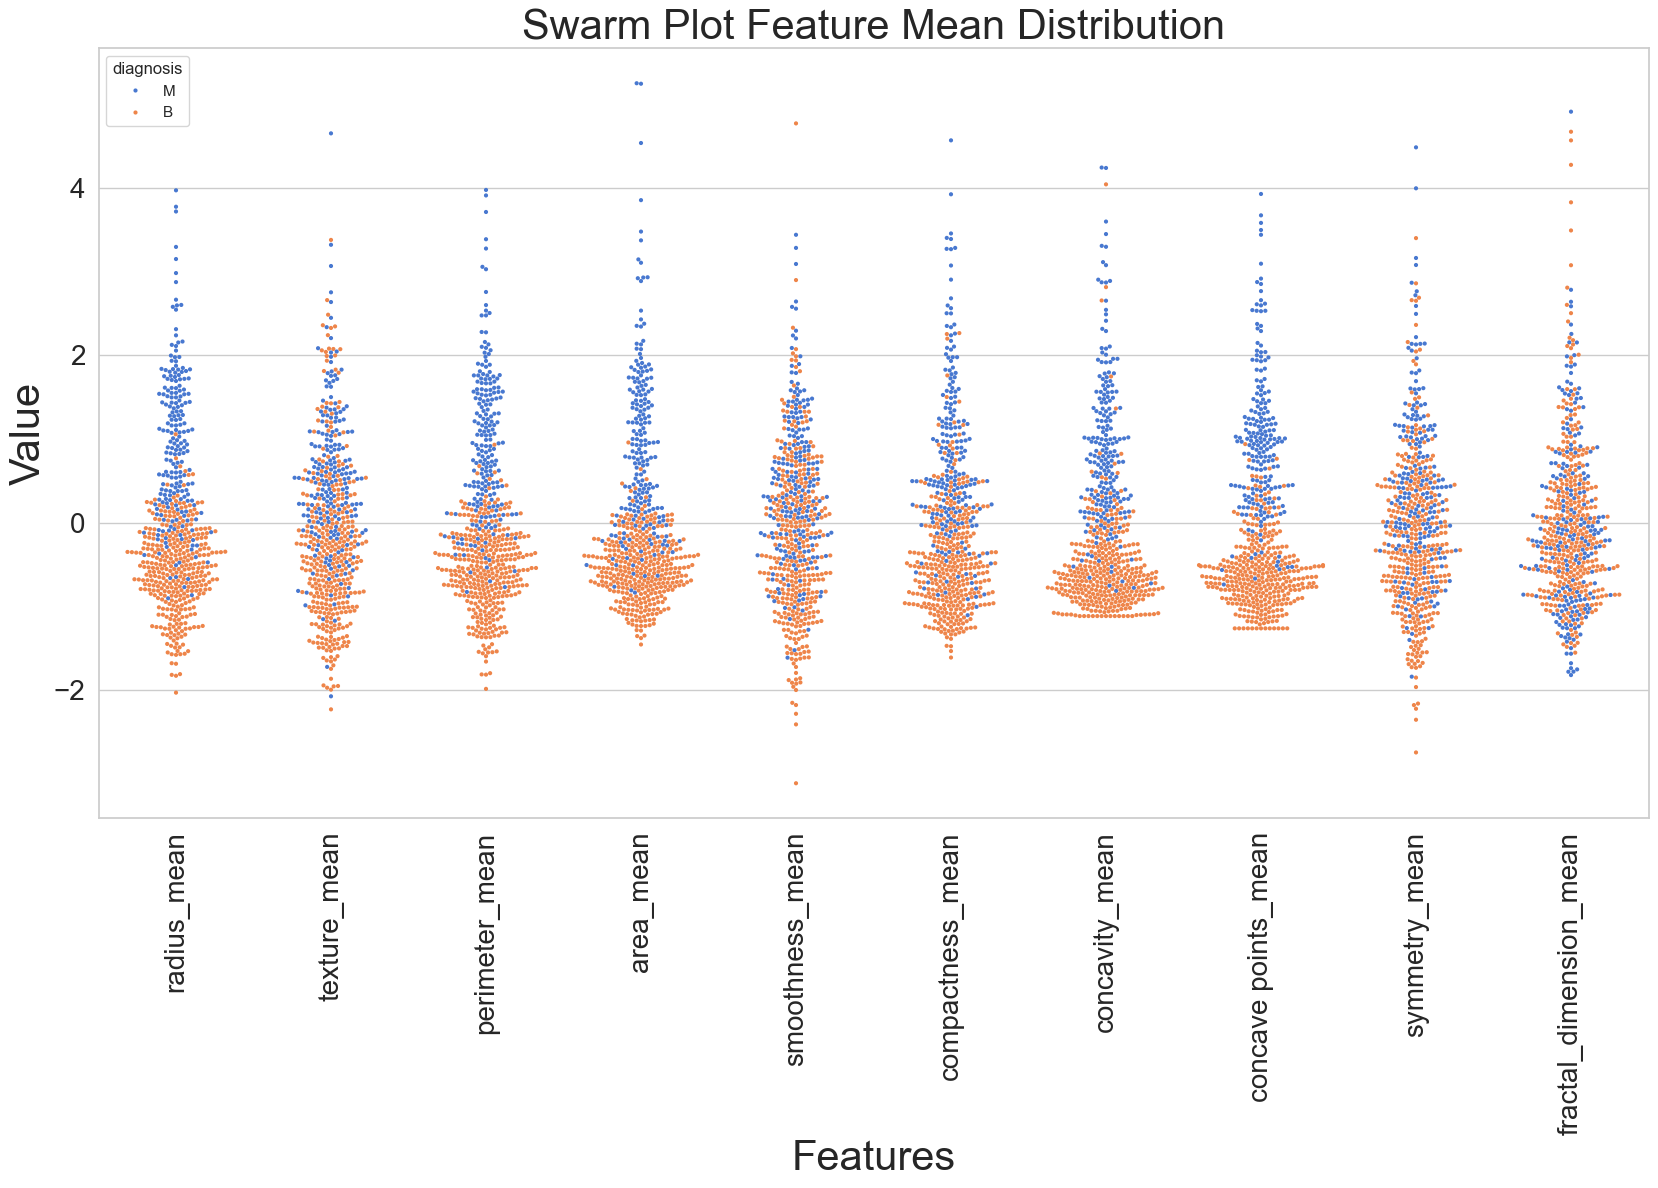

In [39]:
sns.set_theme(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
p = sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=3)
p.set_xlabel('Features', fontsize=30)
p.set_ylabel('Value', fontsize=30)
p.set_title('Swarm Plot Feature Mean Distribution', fontsize=30)
p.tick_params(labelsize=20)

_ = plt.xticks(rotation=90)

There are features like texture_mean, smoothness_mean, symmetry_mean and fractal_dimension_mean that the values for Benign and Malignant overlap, thus making it hard to separate using this features. <br>
There are also some outliners, which we can handle during the training process. <br>
There are features like radius_mean, perimeter_mean, area_mean, concavity_mean and conave_points_mean that the values for Benign and Malignant are separated well, thus making it easier to separate using this features.

#### Feature Standard Error Distribution

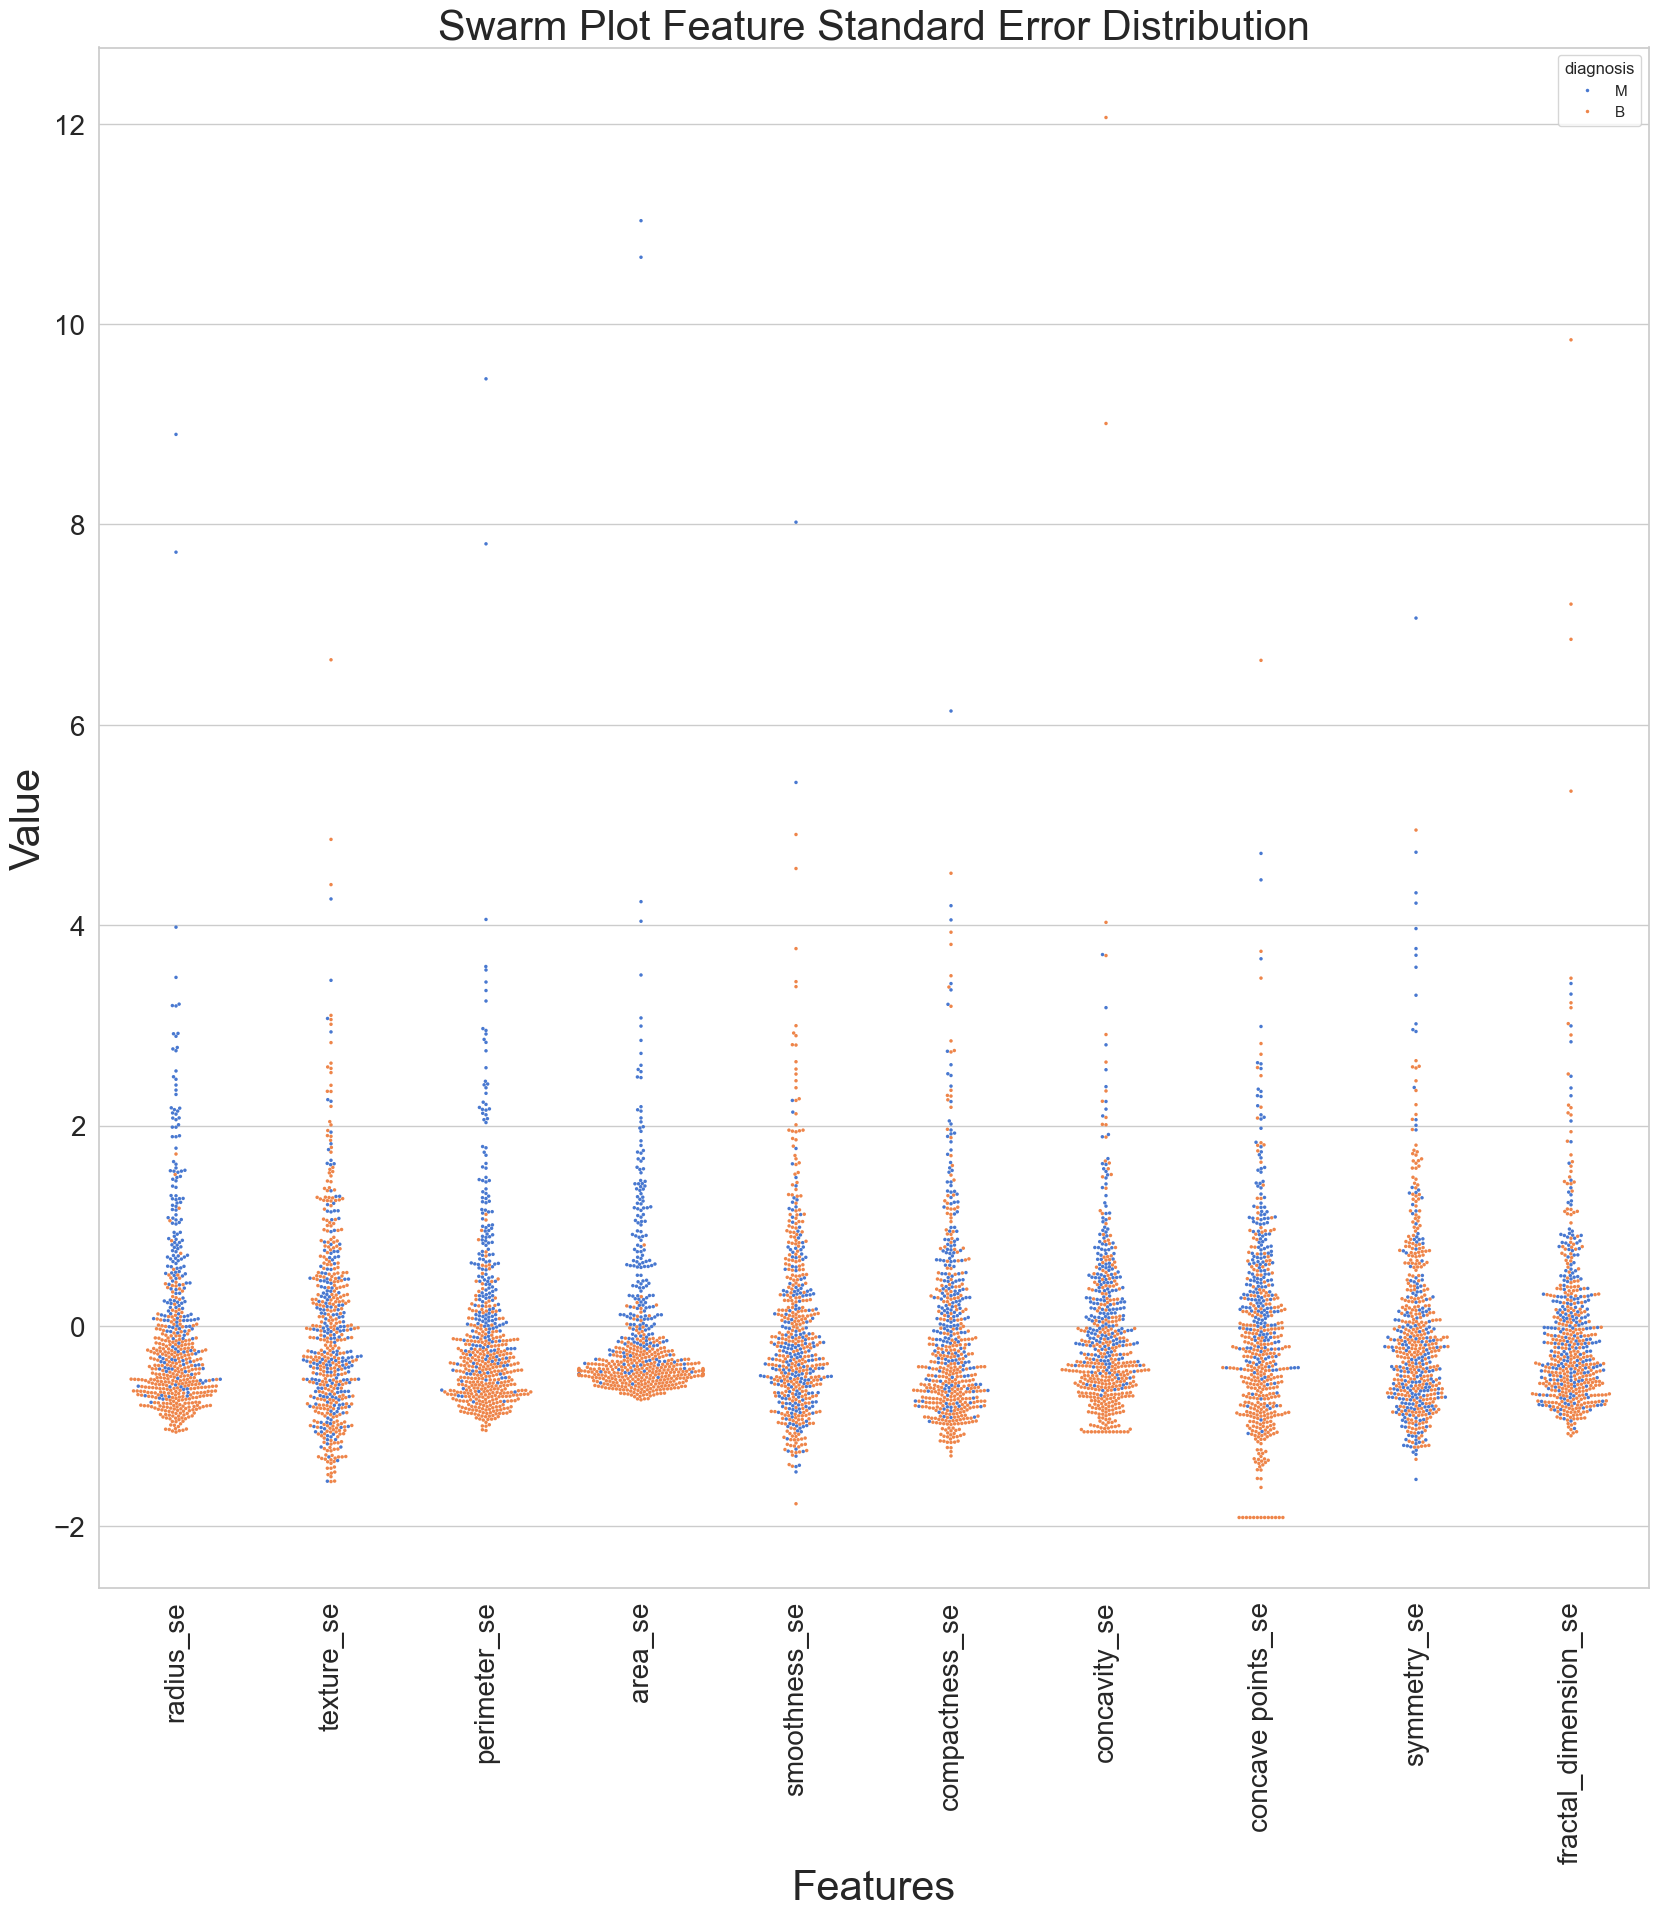

In [40]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,20))
p = sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2.5)
p.set_xlabel('Features', fontsize=30)
p.set_ylabel('Value', fontsize=30)
p.set_title('Swarm Plot Feature Standard Error Distribution', fontsize=30)
p.tick_params(labelsize=20)

_ = plt.xticks(rotation=90)

Most of the features values for Benign and Malignant overlap, making it hard to distinuish between the classes depending on those features, however the area_se seems to be the most separated among them. <br>
We can also observe that the area_se for Benign is more concentrated, and is spread across a wider range of values. <br>
The Standard Error Features gave the most distanced outliners values, which can affect the classification and we will check it later.

#### Feature Worst Distribution

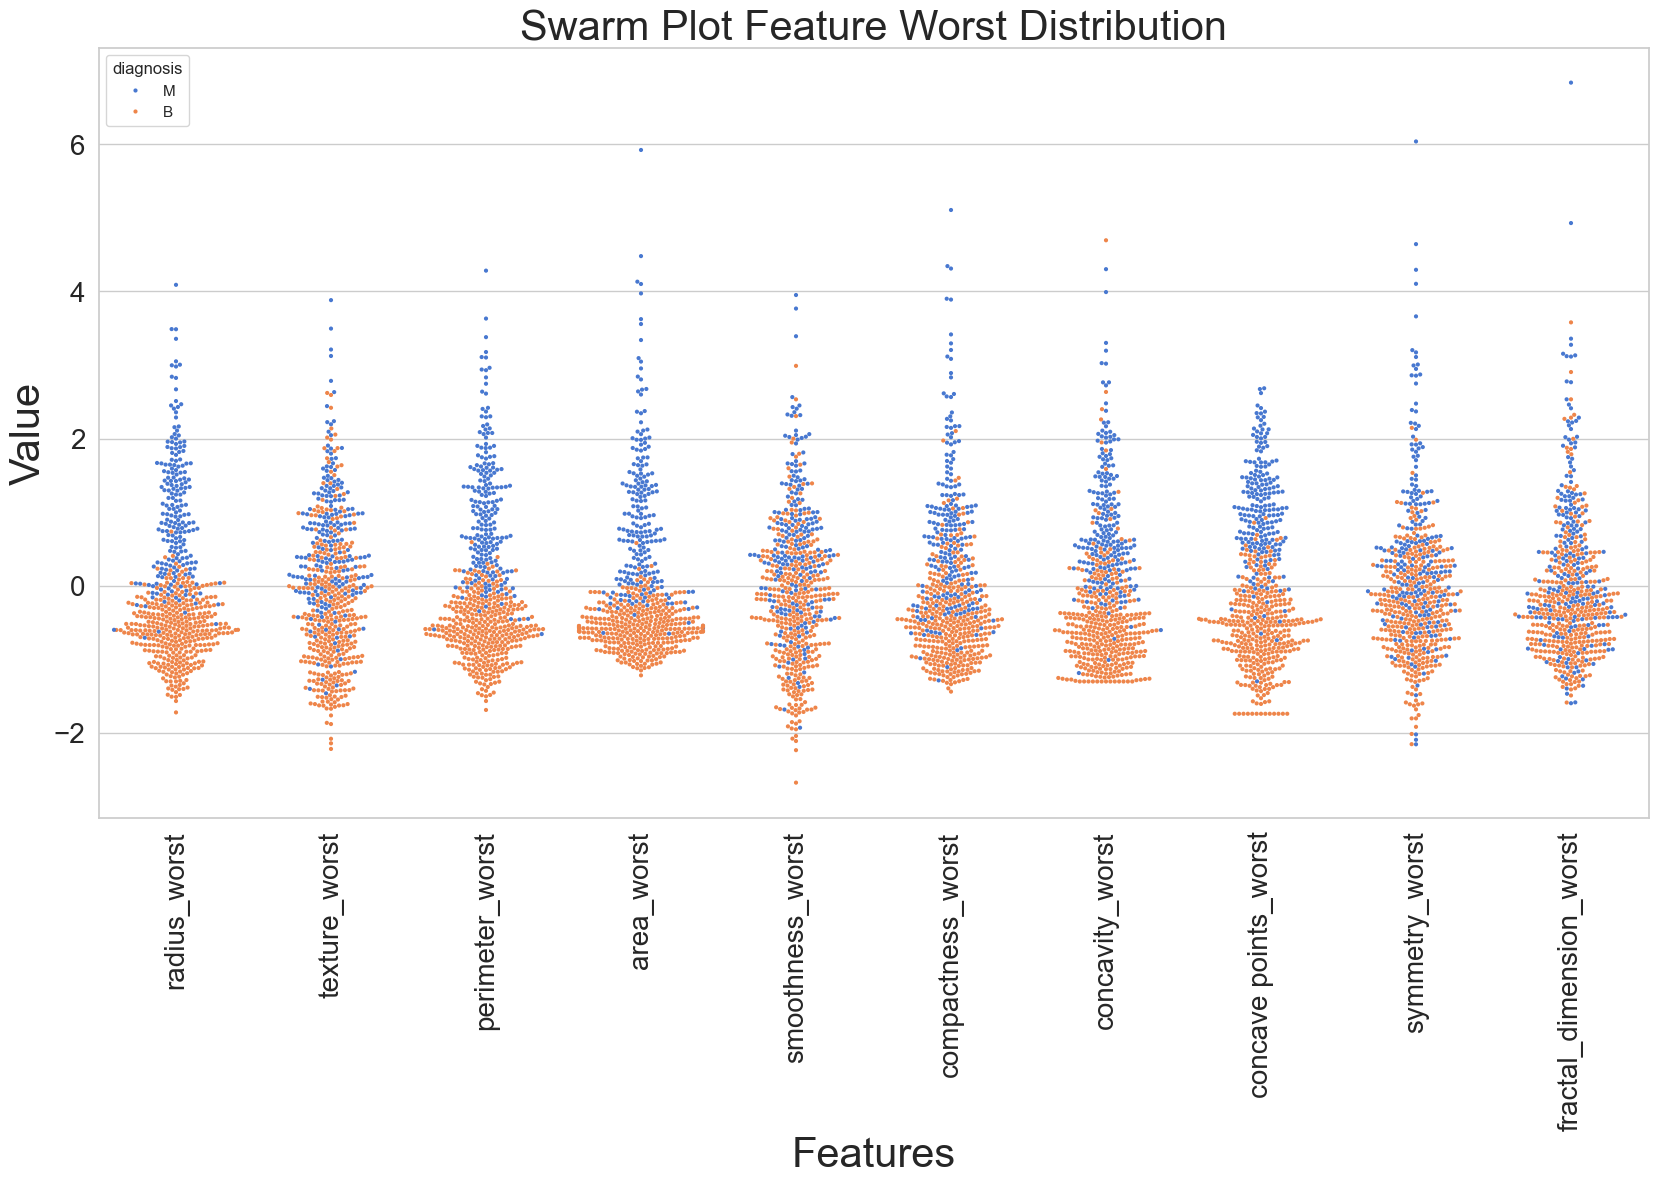

In [42]:
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,10))
p = sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=3)
p.set_xlabel('Features', fontsize=30)
p.set_ylabel('Value', fontsize=30)
p.set_title('Swarm Plot Feature Worst Distribution', fontsize=30)
p.tick_params(labelsize=20)

_ = plt.xticks(rotation=90)

There is similarity between the Features Worst and the Features Mean, however the outliners of Malignant have more positive values and less examples that have ngative values where the Benign examples exists. As we know, outliners can affect the classification, but in those features they are separated into two different regions. <br>
Thus we observe that there are features that are well separated, such as: radius_worst, perimeter_worst and area_worst.

### 3. Normal Distribution Test

In [14]:
dfM = X[y=='M']
dfB = X[y=='B']

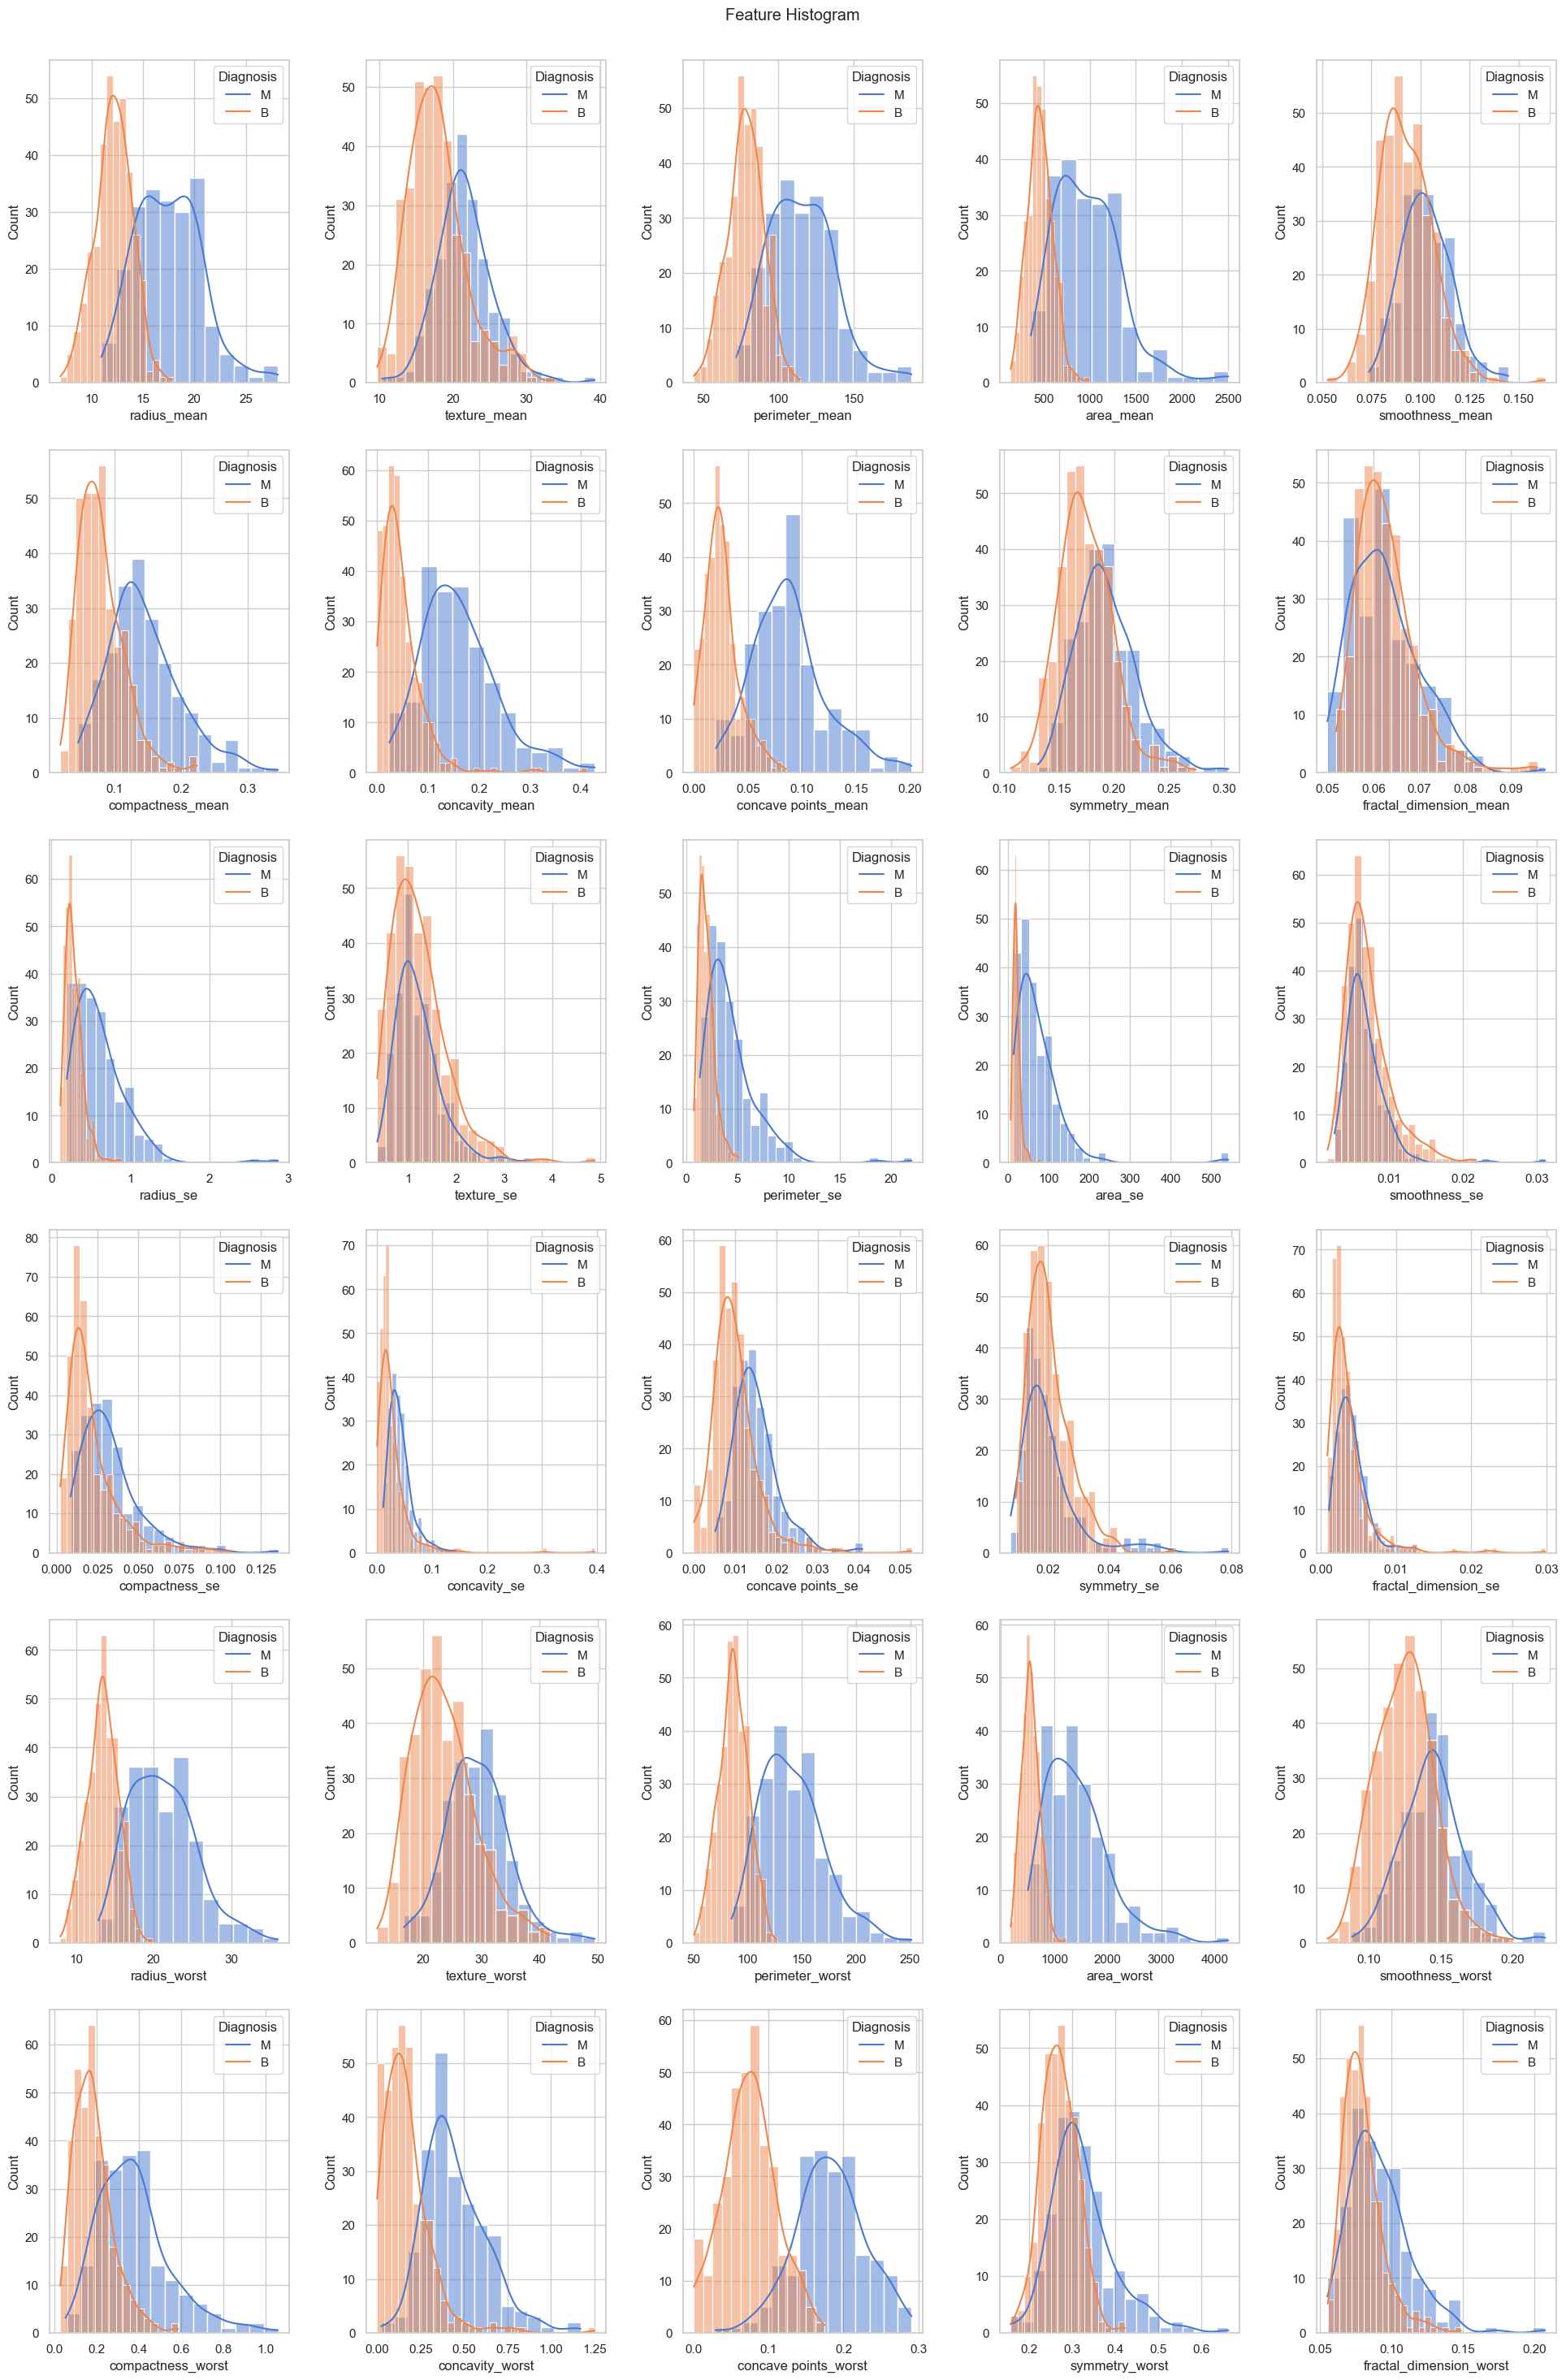

In [15]:
def data_hist(X, y):
    dfM = X[y=='M']
    dfB = X[y=='B']
    
    i = 0
    fig, axs = plt.subplots(6,5, figsize=(20, 30))       
    fig.suptitle('Feature Histogram')
    fig.tight_layout(pad=3)
    for column in X.columns: 
        axes = axs[int(i/5), i%5]
        sns.histplot(ax=axes, data=dfM[column], kde=True)
        sns.histplot(ax=axes, data=dfB[column], kde=True)
        
        i = i + 1
        
        axes.legend(['M', 'B'], title='Diagnosis')

    plt.show()        

data_hist(X, y)

In [16]:
from scipy.stats import shapiro

def data_norm_shapiro(X, y):
    dfM = X[y=='M']
    dfB = X[y=='B']
    df_res = pd.DataFrame(columns=['statistic_M', 'p_value_M', 'statistic_B', 'p_value_B'])
    
    for column in X.columns: 
        statistic_M, p_value_M = shapiro(dfM[column])
        statistic_B, p_value_B = shapiro(dfB[column])
        new_row = {'statistic_M':statistic_M, 'p_value_M':p_value_M, 'statistic_B':statistic_B, 'p_value_B':p_value_B}
        df_res.loc[column] = new_row
        
    return df_res    

df_res = data_norm_shapiro(X, y)

def is_norm_shapiro(df):
    df_res = pd.DataFrame(columns=['is_norm_M', 'is_norm_B'])    

    # check if the distribution is from normal distribution based on p value
    df_res['is_norm_M'] = df['p_value_M'] > 0.05
    df_res['is_norm_B'] = df['p_value_B'] > 0.05

    return df_res


df_res2 = is_norm_shapiro(df_res)
df_res2

,is_norm_M,is_norm_B
radius_mean,False,True
texture_mean,False,False
perimeter_mean,False,True
area_mean,False,False
smoothness_mean,False,False
compactness_mean,False,False
concavity_mean,False,False
concave points_mean,False,False
symmetry_mean,False,False
fractal_dimension_mean,False,False


In [17]:
# print the features that have at least one class which is normally distributed
df_res2.loc[df_res2.any(axis=1)==True]

,is_norm_M,is_norm_B
radius_mean,False,True
perimeter_mean,False,True
radius_worst,False,True
perimeter_worst,False,True
concave points_worst,True,False
symmetry_worst,False,True


### 4. Connections and Statistical Tests between Features

#### Correlation Matrix

Text(0.5, 1.05, 'Correlation of Breast Cancer Dataset Features')

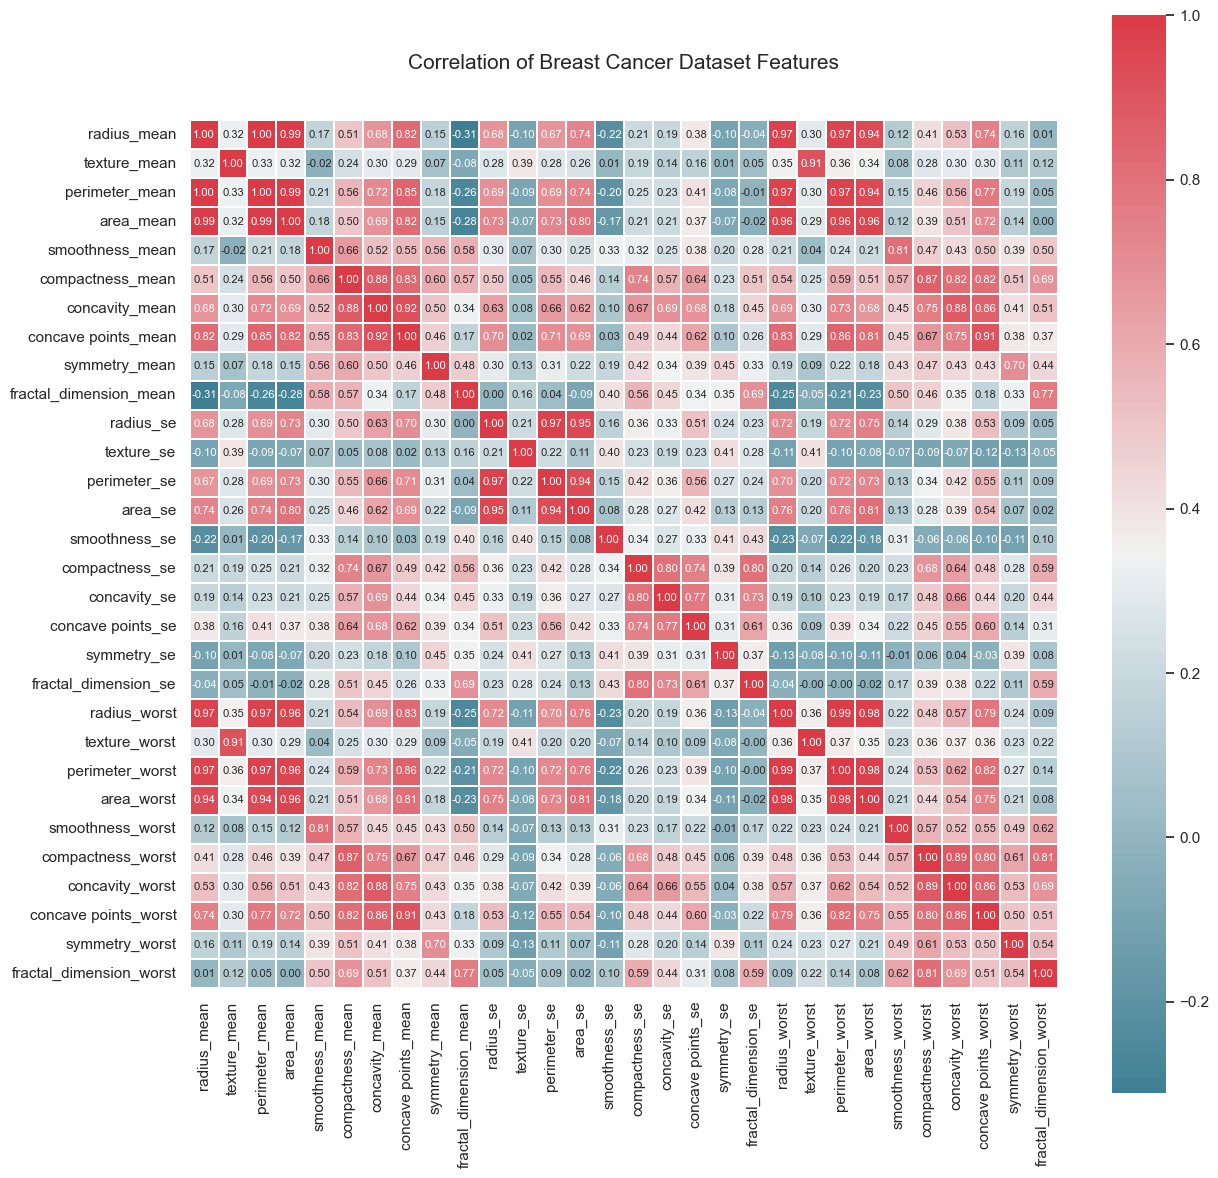

In [18]:
corr = df.iloc[:,1:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of Breast Cancer Dataset Features', y=1.05, size=15)

We can see there are some correlated features in our dataset. <br>
We will evaluate how many features we remove for different thresholds.

Remove features that are above the defined threshold

In [19]:
def get_corr_columns(X, threshold):

    # Compute the correlation matrix
    corr_matrix = X.corr()

    # Create a mask to identify upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find index of features with correlation greater than the threshold
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]    
                                                                
    # Drop the highly correlated features
    X_reduced = X.drop(columns=to_drop)    

    return {'number of features to drop': len(to_drop), 'to_drop': to_drop, 'reduced': list(X_reduced.columns)}

df_corr_comp = pd.DataFrame(columns=['number of features to drop', 'to_drop', 'reduced'])
df_corr_comp.index.name = 'threshold'

thresholds = [0.85, 0.9, 0.95]

for threshold in thresholds:
    new_row = get_corr_columns(X, threshold)
    df_corr_comp.loc[threshold] = new_row

In [20]:
df_corr_comp

,number of features to drop,to_drop,reduced
threshold,,,
0.85,13,"[perimeter_mean, area_mean, concavity_mean, co...","[radius_mean, texture_mean, smoothness_mean, c..."
0.90,10,"[perimeter_mean, area_mean, concave points_mea...","[radius_mean, texture_mean, smoothness_mean, c..."
0.95,7,"[perimeter_mean, area_mean, perimeter_se, area...","[radius_mean, texture_mean, smoothness_mean, c..."


We chose to check different high values of correlation in order to see how it influences the dimensons of the features. <br>
We assume that correlation value bigger than 0.9 means a high enough correlation for us to drop the feature. <br>

#### Statistical Tests

##### Wilcoxon Test

We will use Wilcoxon as it fits our dataset distribution (mostly not normally distributed) and number of groups (2). <br>
We use this test in order to find the significances of differences in feature distributions, <br> Thus we could find features that help us in distinguishing between our groups of Benign and Malignant.

In [21]:
from scipy.stats import mannwhitneyu

def data_test_wilcoxon(X, y):
    dfM = X[y=='M']
    dfB = X[y=='B']
    df_res = pd.DataFrame(columns=['statistic', 'p_value', 'is_significant'])
    
    for column in X.columns: 
        statistic, p_value = mannwhitneyu(dfM[column], dfB[column])
        new_row = {'statistic':statistic, 'p_value':p_value, 'is_significant': p_value<0.05}
        df_res.loc[column] = new_row
        
    return df_res 

df_res3 = data_test_wilcoxon(X, y)
df_res3

,statistic,p_value,is_significant
radius_mean,70955.0,2.692943e-68,True
texture_mean,58717.5,3.428627e-28,True
perimeter_mean,71665.0,3.553870e-71,True
area_mean,71015.5,1.539780e-68,True
smoothness_mean,54647.0,7.793007e-19,True
compactness_mean,65374.5,8.951992e-48,True
concavity_mean,70978.5,2.164549e-68,True
concave points_mean,72992.5,1.006324e-76,True
symmetry_mean,52870.0,2.268050e-15,True
fractal_dimension_mean,36671.5,5.371856e-01,False


In [22]:
df_res4 = df_res3[df_res3['is_significant']==False]
df_res4

,statistic,p_value,is_significant
fractal_dimension_mean,36671.5,0.537186,False
texture_se,38719.5,0.643693,False
smoothness_se,35483.5,0.213632,False


#### 